### HW2
2018136018 유승민

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats.mstats import gmean

In [2]:
f = pd.read_csv('ASOS.csv', encoding='cp949')

In [3]:
f.columns=['Number','Location','Date','Precipitation(mm)']
f.head()

,Number,Location,Date,Precipitation(mm)
0,129,서산,1970-01-01,3.2
1,129,서산,1970-02-01,69.9
2,129,서산,1970-03-01,2.0
3,129,서산,1970-04-01,48.3
4,129,서산,1970-05-01,80.9


### Question 1)
1970년 1월부터 2019년 12월까지의 월 총 강수량 자료에 대한 Gaussian distribution fit의 두 parameters, µ과 σ, 그리고 Gamma distribution fit의 두 parameters, α와 β를 구하여 이론 분포와 실제 자료의 분포 (히스토그램)를 중첩하여 그릴 것. 
두 이론분포에 각각에 대해 비교하기 위한 또 다른 방법으로 Q-Q plot을 그리고 비교할 것.

In [4]:
f['Precipitation(mm)'] = f['Precipitation(mm)'].replace(0,0.1) # 강수량이 아예 0인 지점을 0으로 표기하면 기하평균을 못 구하므로 0.1로 바꿈
avg = f['Precipitation(mm)'].mean()
std = f['Precipitation(mm)'].std(ddof=1)
print(avg,std)

# Gamma distribution의 alpha와 beta를 정하기 위해 평균과 분산을 이용
alpha1 = avg**2/std**2
beta1  = std**2/avg
print(alpha1,beta1)

# Method of maximum likelihood 사용
D = np.log(avg) - np.log(gmean(f['Precipitation(mm)']))
alpha2 = (1+np.sqrt(1+4*D/3))/(4*D)
beta2  = avg/alpha2
print(alpha2,beta2)

# Gaussian과 Gamma distribution
x_values = np.arange(-500, 1000, .1)
gaussian = scipy.stats.norm(loc=avg, scale=std) # 평균과 표준편차가 각각 location과 scale을 결정하는 parameter
gamma1   = scipy.stats.gamma(a=alpha1, scale=beta1) # shape를 결정하는 alpha와 scale을 결정하는 beta
gamma2   = scipy.stats.gamma(a=alpha2, scale=beta2)

102.97283333333334 117.99413037651944
0.7615957601709091 135.20667881636484
1.0059976557740806 102.35891976716316


In [5]:
# set interval to 25
2.0*(f['Precipitation(mm)'].quantile(0.75,interpolation='midpoint')-f['Precipitation(mm)'].quantile(0.25,interpolation='midpoint'))/(len(f)**(1/3))

24.815258954325678

In [6]:
# find the maximum for plotting
f['Precipitation(mm)'].max()
# bins is about 40 = 1000/25

992.7

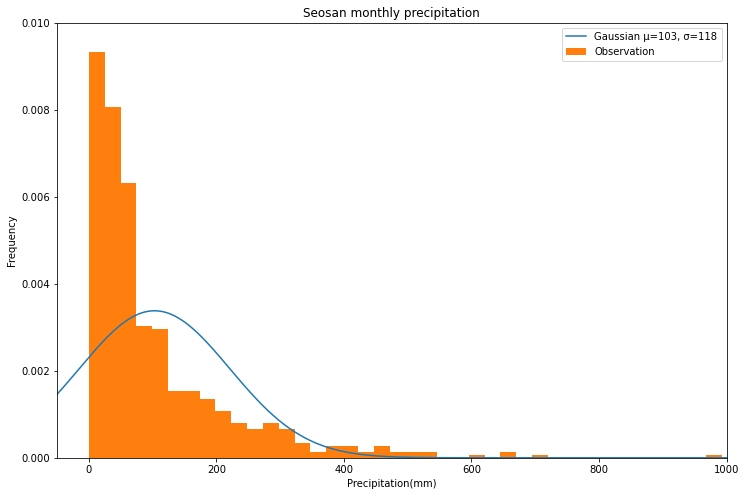

In [7]:
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(x_values, gaussian.pdf(x_values), label=('Gaussian μ=103, σ=118'))
f['Precipitation(mm)'].plot.hist(density=True, bins=40, label = 'Observation') # 1000 / 25 = 40
plt.xlim(left = -50, right = 1000)
plt.ylim(0,0.01)
plt.legend()
plt.xlabel('Precipitation(mm)')
plt.title('Seosan monthly precipitation')
plt.show()

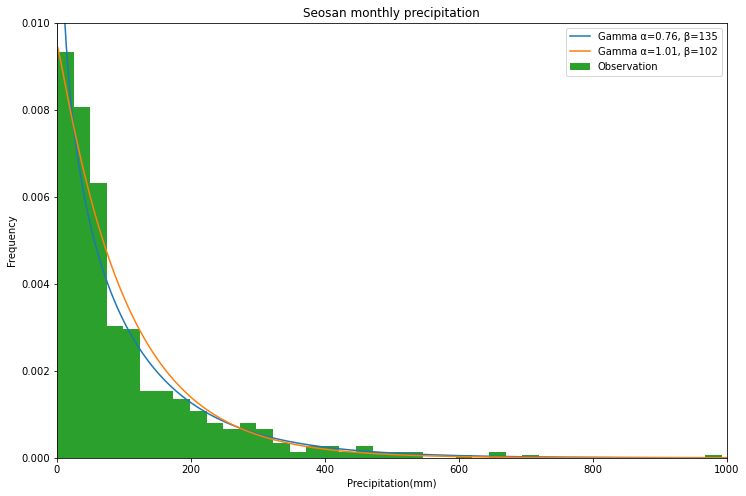

In [8]:
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(x_values, gamma1.pdf(x_values), label=('Gamma α=0.76, β=135'))
plt.plot(x_values, gamma2.pdf(x_values), label=('Gamma α=1.01, β=102'))
f['Precipitation(mm)'].plot.hist(density=True, bins=40, label = 'Observation') # 1000 / 25 = 40
plt.xlim(left = 0, right = 1000)
plt.ylim(0,0.01)
plt.legend()
plt.xlabel('Precipitation(mm)')
plt.title('Seosan monthly precipitation')
plt.show()

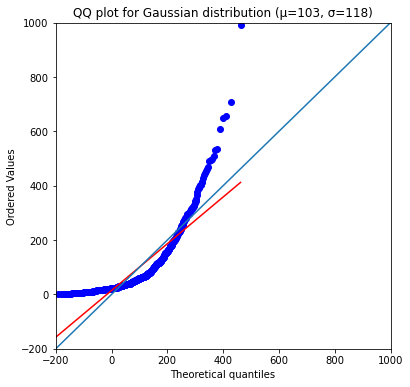

In [9]:
fig, ax = plt.subplots(figsize = (6,6))
scipy.stats.probplot(f['Precipitation(mm)'], dist='norm', plot=ax, sparams=(avg,std), fit=False)
plt.title('QQ plot for Gaussian distribution (μ=103, σ=118)')
plt.xlim(-200,1000)
plt.ylim(-200,1000)
plt.plot([-200,1000],[-200,1000])
plt.show()

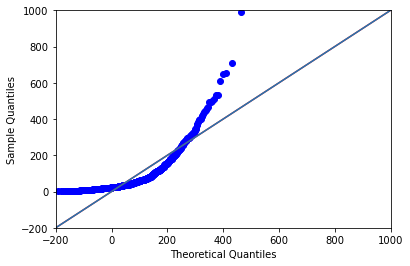

In [21]:
import statsmodels.api as sm
sm.qqplot(f['Precipitation(mm)'], scipy.stats.norm, a=1/3, loc=avg, scale=std, line="45")
plt.xlim(-200,1000)
plt.ylim(-200,1000)
plt.plot([-200,1000],[-200,1000])
plt.show()

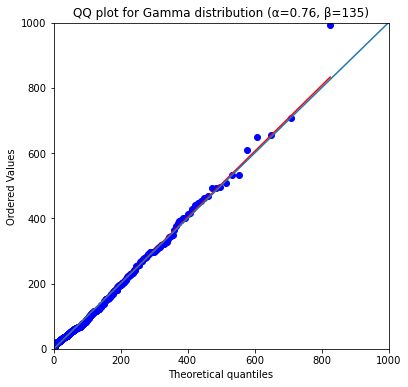

In [11]:
fig, ax = plt.subplots(figsize = (6,6))
scipy.stats.probplot(f['Precipitation(mm)'], dist='gamma', plot=ax, sparams=(alpha1,0,beta1))
plt.title('QQ plot for Gamma distribution (α=0.76, β=135)')
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.plot([0,1000],[0,1000])
plt.show()

In [18]:
import statsmodels.api as sm
sm.qqplot(f['Precipitation(mm)'], scipy.stats.gamma, a=1/3, distargs=(alpha1,0,beta1), line="45")
plt.xlim(-200,1000)
plt.ylim(-200,1000)
plt.plot([-200,1000],[-200,1000])
plt.show()

TypeError: Initializing the distribution failed.  This can occur if distargs contains loc or scale. The distribution initialization command is:
dist(0.7615957601709091, 0, 135.20667881636484, loc=0, scale=1)

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
scipy.stats.probplot(f['Precipitation(mm)'], dist='gamma', plot=ax, sparams=(alpha2,0,beta2))
plt.title('QQ plot for Gamma distribution (α=1.01, β=102)')
plt.xlim(0,800)
plt.ylim(0,800)
plt.plot([0,800],[0,800])
plt.show()

### Question 2)
월 총 강수량 자료를 x라 할 때, y = ln(x)가 Gaussian distribution을 따르는 지 보기위해 Gaussian distribution fit의 두 parameters, µ과 σ, 그리고 Gamma distribution fit의 두 parameters, α와 β를 구하여 1번 문제와 같은 방식으로 비교하여 그릴 것

In [ ]:
# log-normal distribution
log_avg = np.log(f['Precipitation(mm)']).mean()
log_std = np.log(f['Precipitation(mm)']).std()
print(log_avg,log_std)

# Gamma distribution의 alpha와 beta를 정하기 위해 평균과 분산을 이용
log_alpha = log_avg**2/log_std**2
log_beta  = log_std**2/log_avg
print(log_alpha,log_beta)

# Maximum likelihood method는 이중로그의 문제로 제외.

# Gaussian과 Gamma distribution
log_normal = scipy.stats.lognorm(scale=np.exp(log_avg), s=log_std)
log_normal2= scipy.stats.norm(loc=log_avg, scale=log_std)
log_gamma2  = scipy.stats.gamma(a=log_alpha, scale=log_beta) # shape를 결정하는 alpha와 scale을 결정하는 beta

In [ ]:
print(2.6*(np.log(f['Precipitation(mm)']).quantile(0.75,interpolation='midpoint')-np.log(f['Precipitation(mm)']).quantile(0.25,interpolation='midpoint'))/(len(f)**(1/3)))
print(np.log(f['Precipitation(mm)']).max() - np.log(f['Precipitation(mm)']).min())

# set interval approxmately to 0.5
# bins is about 9.2/0.5 = 18.4 -> approximately 19

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(x_values, log_normal2.pdf(x_values), label=('Log-normal (μ=4.06, σ=1.17)'))
plt.plot(x_values, log_gamma2.pdf(x_values), label=('Log-Gamma (α=12, β=0.34)'))
np.log(f['Precipitation(mm)']).plot.hist(density=True, label = 'Observation', bins=19)
ax.set_xticks([np.log(0.1),np.log(1),np.log(10),np.log(100),np.log(1000)])
ax.set_xticklabels([0,1,10,100,1000]) # 0.1은 처음에 0을 대체한 값이므로 ticker는 본래대로 0이다.
#plt.ylim(0,0.01)
plt.xlim(np.log(0.1),np.log(10000))
plt.legend()
plt.xlabel('Precipitation(mm)')
plt.title('Seosan monthly precipitation')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
scipy.stats.probplot(np.log(f['Precipitation(mm)']), dist='norm', plot=ax, sparams=(log_avg, log_std))
ax.set_xticks([np.log(1),np.log(10),np.log(100),np.log(1000)])
ax.set_xticklabels([1,10,100,1000])
ax.set_yticks([np.log(1),np.log(10),np.log(100),np.log(1000)])
ax.set_yticklabels([1,10,100,1000])
plt.title('QQ plot for Log-normal distribution (μ=4.06, σ=1.17)')
plt.plot([0,np.log(1000)],[0,np.log(1000)])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
scipy.stats.probplot(np.log(f['Precipitation(mm)']), dist='gamma', plot=ax, sparams=(log_alpha,0,log_beta))
plt.title('QQ plot for Log-Gamma distribution (α=12, β=0.34)')
ax.set_xticks([np.log(1),np.log(10),np.log(100),np.log(1000)])
ax.set_xticklabels([1,10,100,1000])
ax.set_yticks([np.log(1),np.log(10),np.log(100),np.log(1000)])
ax.set_yticklabels([1,10,100,1000])
plt.plot([0,np.log(1000)],[0,np.log(1000)])
plt.show()

### Question 3)
도시의 월 총 강수량의 연 최대값의 분포에 대해 Gumbel distribution fit의 두 parameters β, ξ를 구하고 Gamma distribution fit의 두 parameters, α와 β를 구하여 1번 문제와 같은 방식으로 비교할 것

In [ ]:
f['Date'] = pd.to_datetime(f['Date'])
# 각 연도의 최댓 값을 가지는 값을 정리한 dataframe fmax를 만듦
fmax = f.groupby(by=f['Date'].dt.year).max()['Precipitation(mm)']
fmax.head()

In [ ]:
print(fmax.max(), fmax.min())
print(2.5*(fmax.quantile(0.75,interpolation='midpoint')-fmax.quantile(0.25,interpolation='midpoint'))/(len(f)**(1/3)))
# set interval to 50 
# bins is about 17 =(1000-150)/50

In [ ]:
# fmax의 평균과 표준편차
fmax_avg = fmax.mean()
fmax_std = fmax.std(ddof=1)
print(fmax_avg, fmax_std)

# Gumbel disribution의 parameters
gumbel_beta = fmax_std*np.sqrt(6.)/np.pi
gumbel_zeta = fmax_avg - 0.57721*gumbel_beta # Euler's constant = 0.57721
print(gumbel_zeta, gumbel_beta)

# Gamma distribution의 alpha와 beta를 정하기 위해 평균과 분산을 이용
fmax_alpha = fmax_avg**2/fmax_std**2
fmax_beta  = fmax_std**2/fmax_avg
print(fmax_alpha, fmax_beta)

# Gamma distribution의 alpha와 beta를 정하기 위해 Method of maximum likelihood 사용
fmax_D = np.log(fmax_avg) - np.log(gmean(fmax))
fmax_alpha2 = (1+np.sqrt(1+4*fmax_D/3))/(4*fmax_D)
fmax_beta2  = fmax_avg/fmax_alpha2
print(fmax_alpha2,fmax_beta2)

In [ ]:
# Gaussian과 Gamma distribution
x_values = np.arange(-50, 1000, .1)
fmax_gumbel = scipy.stats.gumbel_r(loc=gumbel_zeta, scale=gumbel_beta) # 평균과 표준편차가 각각 location과 scale을 결정하는 parameter
fmax_gamma1 = scipy.stats.gamma(a=fmax_alpha, scale=fmax_beta) # shape를 결정하는 alpha와 scale을 결정하는 beta
fmax_gamma2 = scipy.stats.gamma(a=fmax_alpha2, scale=fmax_beta2)

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
plt.plot(x_values, fmax_gumbel.pdf(x_values) ,label=('Gumbel ζ=292, β=127'))
plt.plot(x_values, fmax_gamma1.pdf(x_values) ,label=('Gamma α=5.04, β=72.3'))
plt.plot(x_values, fmax_gamma2.pdf(x_values) ,label=('Gamma α=6.02, β=60.6'))
fmax.plot.hist(density=True, label = 'Histogram', bins=17, color='grey')
plt.xlim(left = 0, right = 1000)
plt.legend()
plt.xlabel('Precipitation(mm)')
plt.title('Seosan annual maximum of monthly precipitation')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
scipy.stats.probplot(fmax, dist='gumbel_r', plot=ax, sparams=(gumbel_zeta,gumbel_beta))
plt.title('QQ plot for Gumbel distribution (ζ=292, β=127)')
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.plot([0,1000],[0,1000])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
scipy.stats.probplot(fmax, dist='gamma', plot=ax, sparams=(fmax_alpha,0,fmax_beta))
plt.title('QQ plot for Gamma distribution (α=5.04, β=72.3)')
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.plot([0,1000],[0,1000])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
scipy.stats.probplot(fmax, dist='gamma', plot=ax, sparams=(fmax_alpha2,0,fmax_beta2))
plt.title('QQ plot for Gamma distribution (α=6.02, β=60.6)')
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.plot([0,1000],[0,1000])
plt.show()